In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('train.csv')

#Drop de cosas que no necesitamos en dolar
dolar= pd.read_csv('Datos históricos USD_MXN.csv')
dolar.columns = ["fecha", "last", "opening", "max", "min", "std"]
dolar.drop(["std", "opening", "opening", "max", "min"], axis=1 ,inplace=True)

#Modificamos dolar para que se parezca al otro DF
dolar['date'] = pd.to_datetime(dolar['fecha'], format="%b %Y")
dolar.drop(["fecha"], axis=1, inplace=True)
dolar.columns= ['price', "date"]
dolar['price'] = dolar['price'].replace(',', '.', regex=True).astype(float)
dolar["year"] = dolar.date.dt.year
dolar['month'] = dolar.date.dt.month
dolar.drop(["date"], axis=1, inplace=True)

#Hacemos el merge, dejamos el precio dolar y el precio original
df['fecha'] = pd.to_datetime(df['fecha'])
df['year'] = df['fecha'].dt.year
df['month']= df['fecha'].dt.month
newDf= pd.merge(df, dolar, on=['year', 'month'], how='left')
newDf["dollar_price"] = newDf.apply(lambda row: row["precio"]/row["price"], axis=1)
df = newDf.filter(["id", "tipodepropiedad", "habitaciones",'garages', 'banos', 'ciudad',
                   'provincia','metroscubiertos', 'metrostotales', 'idzona', 'fecha',
                   'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
                   'centroscomercialescercanos', 'dollar_price','precio' ])

#Creamos la funcion
def asignarMetros(metroscubiertos, metrostotales):
    if (metroscubiertos != 0 and metrostotales == 0):
        return metroscubiertos
    else:
        return metrostotales

def asignarMetrosLibres(metroscubiertos, metrostotales):
    if (metroscubiertos != metrostotales):
        return metrostotales-metroscubiertos
    else:
        return 0
    
#Arreglando, no pueden haber propiedades con metros cubiertos pero sin metros totales
df['metrostotales'].fillna(0, inplace=True)
df['metrostotales'] = df.apply(lambda x: asignarMetros(x['metroscubiertos'],x['metrostotales']),axis=1)
df['metroslibres'] = df.apply(lambda x: asignarMetrosLibres(x['metroscubiertos'],x['metrostotales']),axis=1)

###### FILTRO DE TERRENO #######
filtroTerreno = df["tipodepropiedad"].isin(["Edificio","Huerta", "Nave industrial", "Terreno", "Terreno comercial","Bodega comercial", "Terreno industrial"])
dfTerreno = df[filtroTerreno]

####### FILTRO SI QUEREMOS CASAS Y COSAS COMO CASA #######
#Dropeo todos los terrenos que tienen habitaciones ya que si las tienen no serian terrenos.
dfTerreno = dfTerreno[dfTerreno["habitaciones"].isna()]

#Limpiando las propiedades tipo casa, no pueden no tener al menos una habitacion o baño y no pueden
#tener metros no cubiertos
filtro1 = df["tipodepropiedad"].isin(["Apartamento", "Casa", "Casa en condominio",
                                        "Casa uso de suelo", "Rancho", "Quinta Vacacional"])
dfCasas = df[filtro1]
dfCasas = dfCasas[np.isfinite(dfCasas['habitaciones'])]
dfCasas = dfCasas[np.isfinite(dfCasas['banos'])]
dfCasas = dfCasas[np.isfinite(dfCasas['metroscubiertos'])]
dfCasas.garages.fillna(0, inplace=True)

df = pd.merge(dfCasas, dfTerreno, on=['id', 'tipodepropiedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos'
                                      ,'ciudad','provincia','metrostotales','metroslibres','idzona','fecha', 'gimnasio','usosmultiples',
                                       'piscina','escuelascercanas','centroscomercialescercanos', 'dollar_price','precio'], how='outer')


#### DE ACA EN ADELANTE, USAR DF #####

Text(0.5,1,'Apartamentos')

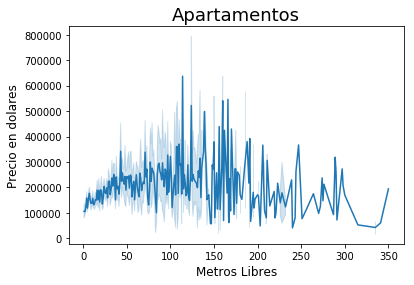

In [15]:
filtro1 = df["tipodepropiedad"].isin(["Apartamento"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

g.set_xlabel("Metros Libres",fontsize=12)
g.set_ylabel("Precio en dolares", fontsize=12)
g.set_title("Apartamentos", fontsize=18)

Text(0.5,1,'Casas en condominio')

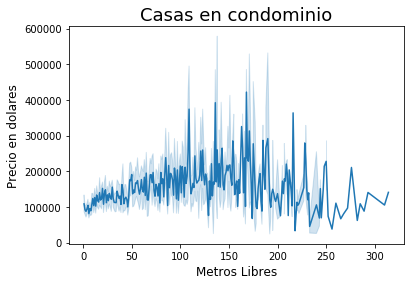

In [16]:
filtro1 = df["tipodepropiedad"].isin(["Casa en condominio"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

g.set_xlabel("Metros Libres",fontsize=12)
g.set_ylabel("Precio en dolares", fontsize=12)
g.set_title("Casas en condominio", fontsize=18)

Text(0.5,1,'Casas')

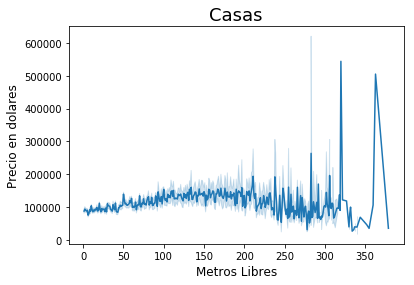

In [17]:
filtro1 = df["tipodepropiedad"].isin(["Casa"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

g.set_xlabel("Metros Libres",fontsize=12)
g.set_ylabel("Precio en dolares", fontsize=12)
g.set_title("Casas", fontsize=18)

In [36]:
filtro1 = df["tipodepropiedad"].isin(["Quinta Vacacional"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()
#
#g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

#g.set_xlabel("Metros Libres",fontsize=12)
#g.set_ylabel("Precio en dolares", fontsize=12)
#g.set_title("Quintas Vacacional", fontsize=18)

id                            17
tipodepropiedad               17
habitaciones                  17
garages                       17
banos                         17
ciudad                        17
provincia                     17
metroscubiertos               17
metrostotales                 17
idzona                        14
fecha                         17
gimnasio                      17
usosmultiples                 17
piscina                       17
escuelascercanas              17
centroscomercialescercanos    17
dollar_price                  17
precio                        17
metroslibres                  17
dtype: int64

Text(0.5,1,'Casas uso de suelo')

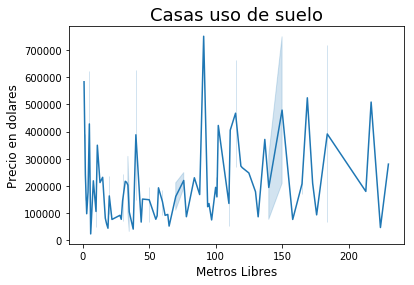

In [37]:
filtro1 = df["tipodepropiedad"].isin(["Casa uso de suelo"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

g.set_xlabel("Metros Libres",fontsize=12)
g.set_ylabel("Precio en dolares", fontsize=12)
g.set_title("Casas uso de suelo", fontsize=18)

In [38]:
filtro1 = df["tipodepropiedad"].isin(["Rancho"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

#g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

#g.set_xlabel("Metros Libres",fontsize=12)
#g.set_ylabel("Precio en dolares", fontsize=12)
#g.set_title("Ranchos", fontsize=18)

id                            0
tipodepropiedad               0
habitaciones                  0
garages                       0
banos                         0
ciudad                        0
provincia                     0
metroscubiertos               0
metrostotales                 0
idzona                        0
fecha                         0
gimnasio                      0
usosmultiples                 0
piscina                       0
escuelascercanas              0
centroscomercialescercanos    0
dollar_price                  0
precio                        0
metroslibres                  0
dtype: int64

Text(0.5,1,'Terrenos')

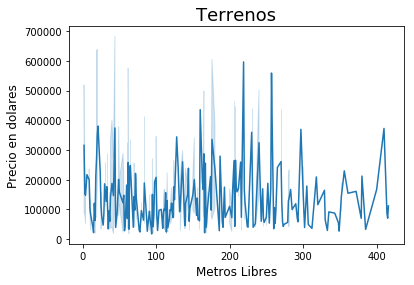

In [39]:
filtro1 = df["tipodepropiedad"].isin(["Terreno"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

g.set_xlabel("Metros Libres",fontsize=12)
g.set_ylabel("Precio en dolares", fontsize=12)
g.set_title("Terrenos", fontsize=18)

Text(0.5,1,'Terrenos comerciales')

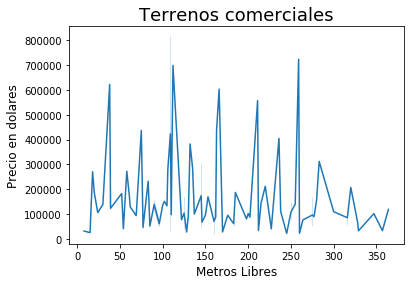

In [40]:
filtro1 = df["tipodepropiedad"].isin(["Terreno comercial"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

g.set_xlabel("Metros Libres",fontsize=12)
g.set_ylabel("Precio en dolares", fontsize=12)
g.set_title("Terrenos comerciales", fontsize=18)

In [41]:
filtro1 = df["tipodepropiedad"].isin(["Edificio"])
da = df[filtro1]

da.count()

#df2=da[(da['metroslibres']>0)]
#df2.count()

#g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)
#g.set_xlabel("Metros Libres",fontsize=12)
#g.set_ylabel("Precio en dolares", fontsize=12)
#g.set_title("Edificios", fontsize=18)

id                            1093
tipodepropiedad               1093
habitaciones                     0
garages                        665
banos                          226
ciudad                        1093
provincia                     1093
metroscubiertos                526
metrostotales                 1093
idzona                         990
fecha                         1093
gimnasio                      1093
usosmultiples                 1093
piscina                       1093
escuelascercanas              1093
centroscomercialescercanos    1093
dollar_price                  1093
precio                        1093
metroslibres                   526
dtype: int64

Text(0.5,1,'Bodegas Comerciales')

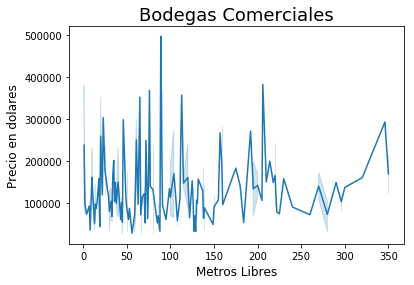

In [42]:
filtro1 = df["tipodepropiedad"].isin(["Bodega comercial"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

g.set_xlabel("Metros Libres",fontsize=12)
g.set_ylabel("Precio en dolares", fontsize=12)
g.set_title("Bodegas Comerciales", fontsize=18)

In [29]:
filtro1 = df["tipodepropiedad"].isin(["Nave industrial"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

#g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

#g.set_xlabel("Metros Libres",fontsize=12)
#g.set_ylabel("Precio en dolares", fontsize=12)
#g.set_title("Naves Industriales", fontsize=18)

id                            11
tipodepropiedad               11
habitaciones                   0
garages                        9
banos                          7
ciudad                        11
provincia                     11
metroscubiertos               11
metrostotales                 11
idzona                        10
fecha                         11
gimnasio                      11
usosmultiples                 11
piscina                       11
escuelascercanas              11
centroscomercialescercanos    11
dollar_price                  11
precio                        11
metroslibres                  11
dtype: int64

In [30]:
filtro1 = df["tipodepropiedad"].isin(["Terreno industrial"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

#g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

#g.set_xlabel("Metros Libres",fontsize=12)
#g.set_ylabel("Precio en dolares", fontsize=12)
#g.set_title("Terrenos Industriales", fontsize=18)

id                            3
tipodepropiedad               3
habitaciones                  0
garages                       0
banos                         0
ciudad                        3
provincia                     3
metroscubiertos               3
metrostotales                 3
idzona                        2
fecha                         3
gimnasio                      3
usosmultiples                 3
piscina                       3
escuelascercanas              3
centroscomercialescercanos    3
dollar_price                  3
precio                        3
metroslibres                  3
dtype: int64

In [31]:
filtro1 = df["tipodepropiedad"].isin(["Huerta"])
da = df[filtro1]

da.count()

df2=da[(da['metroslibres']>0)]
df2.count()

#g = sns.lineplot(x="metroslibres",y='dollar_price',data=df2)

#g.set_xlabel("Metros Libres",fontsize=12)
#g.set_ylabel("Precio en dolares", fontsize=12)
#g.set_title("Huertas", fontsize=18)

id                            0
tipodepropiedad               0
habitaciones                  0
garages                       0
banos                         0
ciudad                        0
provincia                     0
metroscubiertos               0
metrostotales                 0
idzona                        0
fecha                         0
gimnasio                      0
usosmultiples                 0
piscina                       0
escuelascercanas              0
centroscomercialescercanos    0
dollar_price                  0
precio                        0
metroslibres                  0
dtype: int64

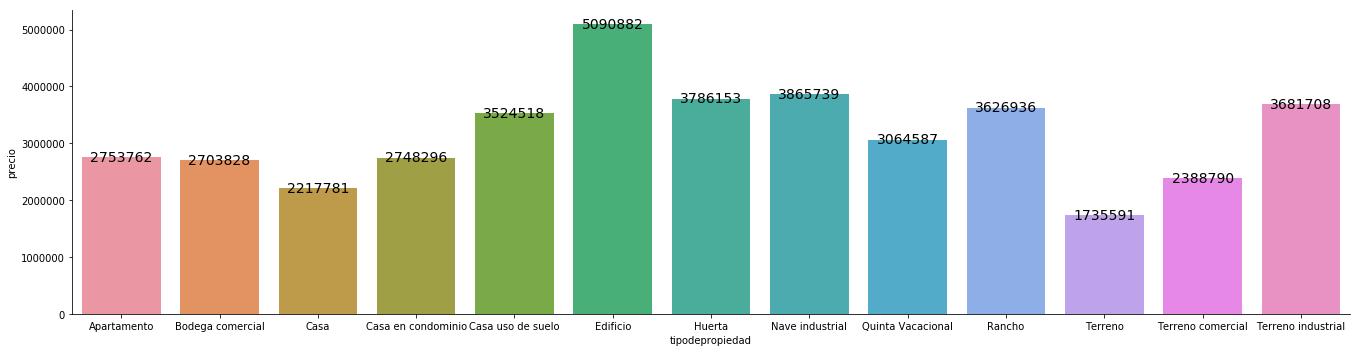

In [16]:
da = df.groupby('tipodepropiedad').agg({'precio':'mean'})
da.reset_index(inplace=True)
g = sns.catplot(x='tipodepropiedad',y='precio',kind='bar',
            data=da,height=5, aspect=3.8)

for i, bar in enumerate(g.ax.patches):
    h = bar.get_height()
    g.ax.text(
        i, # bar index (x coordinate of text)
        h+10, # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center', 
        va='center', 
        #fontweight='bold', 
        size=14)